In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
# Load the Employee Attrition dataset
data = pd.read_csv("Employee_attrition.csv")

# Display first 5 rows
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# No missing values found in the dataset
data.isnull().sum().sum()


np.int64(0)

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Check dataset after encoding
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Features and Target
X = data.drop("Attrition", axis=1)   # 'Attrition' is target
y = data["Attrition"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1470, 34)
Shape of y: (1470,)


In [ ]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1176, 34)
Testing set size: (294, 34)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred = log_reg.predict(X_test)


In [ ]:
# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression - Employee Attrition Prediction")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Logistic Regression - Employee Attrition Prediction
Precision: 0.6842
Recall: 0.3333
F1-Score: 0.4483


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("heart.csv")

# Show first few rows
print(data.head())
print("Shape:", data.shape)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Shape: (1025, 14)


In [ ]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Fill missing values with mean (if any found)
data = data.fillna(data.mean())



Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Features and target
X = data.drop("target", axis=1)
y = data["target"]


In [ ]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize KNN (k=5 as default)
knn = KNeighborsClassifier(n_neighbors=5)

# Train model
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)
y_prob = knn.predict_proba(X_test_scaled)[:, 1]  # for ROC-AUC


In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8634146341463415
ROC-AUC: 0.9629047619047618

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.86      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



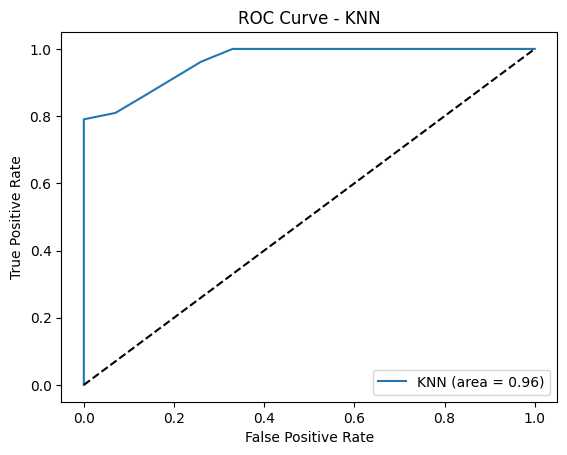

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="KNN (area = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:

df = pd.read_csv('/content/hospital_readmissions_30k.csv')

# Display basic info (optional for debugging)
print(df.head())
print(df.info())
print(df.describe())

   patient_id  age  gender blood_pressure  cholesterol   bmi diabetes  \
0           1   74   Other         130/72          240  31.5      Yes   
1           2   46  Female         120/92          292  36.3       No   
2           3   89   Other         135/78          153  30.3       No   
3           4   84  Female         123/80          153  31.5       No   
4           5   32   Other         135/84          205  18.4       No   

  hypertension  medication_count  length_of_stay discharge_destination  \
0           No                 5               1      Nursing_Facility   
1           No                 4               3      Nursing_Facility   
2          Yes                 1               1                  Home   
3          Yes                 3              10                  Home   
4          Yes                 6               4      Nursing_Facility   

  readmitted_30_days  
0                Yes  
1                 No  
2                 No  
3                 No  
4

In [ ]:
# Parse blood_pressure into systolic and diastolic (assuming format 'systolic/diastolic')
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True)
df['systolic'] = pd.to_numeric(df['systolic'], errors='coerce')
df['diastolic'] = pd.to_numeric(df['diastolic'], errors='coerce')

# Drop unnecessary columns
df = df.drop(['patient_id', 'blood_pressure'], axis=1)

# Binary encode Yes/No columns
binary_cols = ['diabetes', 'hypertension', 'readmitted_30_days']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])  # Yes=1, No=0

# One-hot encode categorical columns
categorical_cols = ['gender', 'discharge_destination']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df.drop('readmitted_30_days', axis=1)
y = df['readmitted_30_days']

In [ ]:
# Fill missing values with mean (for numerical columns)
numerical_cols = ['age', 'cholesterol', 'bmi', 'medication_count', 'length_of_stay', 'systolic', 'diastolic']
imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize KNN classifier (using k=5 as default; can tune if needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on test set
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC (positive class)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.8647
ROC-AUC: 0.5141


In [2]:
# Import libraries
import pandas as pd

# Load dataset
df = pd.read_csv("WineQT.csv")   # already uploaded in Colab

# Display first few rows
print("First 5 rows:")
display(df.head())

# Shape of dataset
print("\nShape of dataset (rows, columns):", df.shape)

# Missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data types
print("\nData types of columns:")
print(df.dtypes)


First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



Shape of dataset (rows, columns): (1143, 13)

Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Data types of columns:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [3]:
from sklearn.preprocessing import StandardScaler

# Fill missing values with median (if any)
df = df.fillna(df.median(numeric_only=True))

# Separate features (X) and target (y)
X = df.drop(columns=["quality"])   # "quality" is the target
y = df["quality"]

# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size :", X_test.shape)


Training set size: (914, 12)
Testing set size : (229, 12)


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import numpy as np

# Predictions
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# For ROC-AUC (multi-class) → use One-vs-Rest strategy
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
print("ROC-AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.6200873362445415
ROC-AUC Score: 0.6170358712496948

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  4  2  0  0]
 [ 0  0 74 22  1  0]
 [ 0  1 28 51 10  2]
 [ 0  0  6  7 16  0]
 [ 0  0  0  1  2  0]]

Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.14      0.22         7
           5       0.65      0.76      0.70        97
           6       0.61      0.55      0.58        92
           7       0.55      0.55      0.55        29
           8       0.00      0.00      0.00         3

    accuracy                           0.62       229
   macro avg       0.39      0.34      0.34       229
weighted avg       0.61      0.62      0.61       229



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


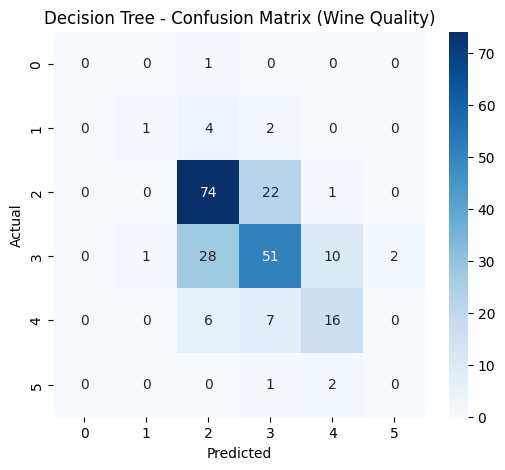

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


NameError: name 'auc' is not defined

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix (Wine Quality)")
plt.show()

# ROC Curve (One-vs-Rest for multiclass)
fpr = dict()
tpr = dict()
roc_auc_vals = dict()
n_classes = len(np.unique(y))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc_vals[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc_vals[i]))

plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (Wine Quality)")
plt.legend(loc="lower right")
plt.show()


In [8]:
# Import libraries
import pandas as pd

# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Display first few rows
print("First 5 rows:")
display(df.head())

# Shape of dataset
print("\nShape of dataset (rows, columns):", df.shape)

# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())


First 5 rows:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



Shape of dataset (rows, columns): (5572, 5)

Missing values in dataset:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [9]:
# Keep only 'v1' (label) and 'v2' (message)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Encode labels: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print("\nClass distribution:")
print(df['label'].value_counts())



Class distribution:
label
0    4825
1     747
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Training set size:", X_train_tfidf.shape)
print("Testing set size :", X_test_tfidf.shape)


Training set size: (4457, 5000)
Testing set size : (1115, 5000)


In [11]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Predictions
y_pred = nb_model.predict(X_test_tfidf)
y_pred_proba = nb_model.predict_proba(X_test_tfidf)[:,1]

# Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy : 0.9721973094170404
Precision: 0.9916666666666667
Recall   : 0.7986577181208053
F1-Score : 0.8847583643122676
ROC-AUC  : 0.9883210360304029

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



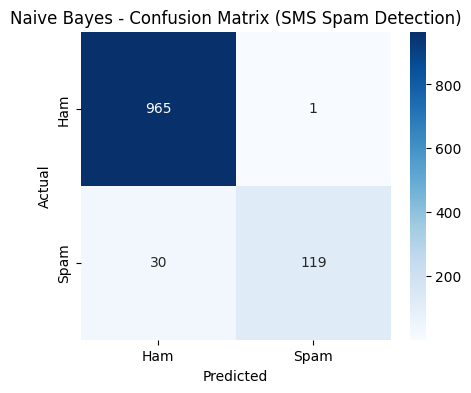

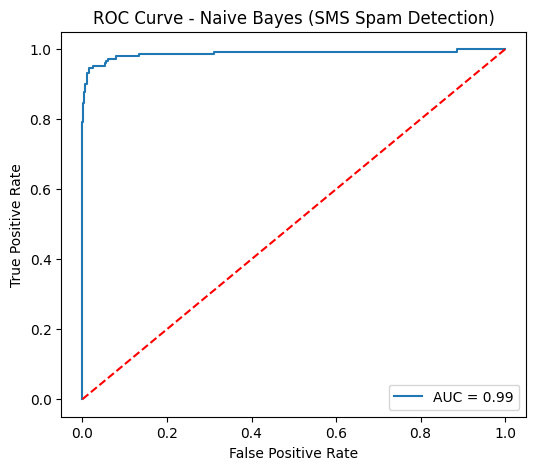

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes - Confusion Matrix (SMS Spam Detection)")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes (SMS Spam Detection)")
plt.legend(loc="lower right")
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:

df = pd.read_csv('/content/brca.csv', index_col=0)  # Set first column as index since it's an unnamed ID

# Display basic info (optional for debugging)
print(df.head())
print(df.info())
print(df.describe())

   x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
1         13.540           14.36             87.46        566.3   
2         13.080           15.71             85.63        520.0   
3          9.504           12.44             60.34        273.9   
4         13.030           18.42             82.61        523.8   
5          8.196           16.84             51.71        201.9   

   x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
1            0.09779             0.08129           0.06664   
2            0.10750             0.12700           0.04568   
3            0.10240             0.06492           0.02956   
4            0.08983             0.03766           0.02562   
5            0.08600             0.05943           0.01588   

   x.concave_pts_mean  x.symmetry_mean  x.fractal_dim_mean  ...  \
1            0.047810           0.1885             0.05766  ...   
2            0.031100           0.1967             0.06811  ...   
3            0.020760  

In [16]:
# Encode the target 'y' ('B' for benign=0, 'M' for malignant=1)
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

# Separate features and target (all features are numerical)
X = df.drop('y', axis=1)
y = df['y']

In [17]:
# Identify numerical columns (all in X)
numerical_cols = X.columns.tolist()

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [18]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize KNN classifier (using k=5 as default; can tune if needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9298
Confusion Matrix:
[[70  1]
 [ 7 36]]
